In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns',1000)
pd.set_option('display.max_rows',1000)

In [2]:
#read from xl csv...
df = pd.read_excel('CaraHittahV2.xlsx', sheet_name=None, ignore_index = False, sort=True)
cdf = pd.concat(df.values())

In [3]:
#the CSV is a bit of a mess - we take first row as the header, and start from row 2
#cdf.head()
cdf.columns = cdf.iloc[1, :]
cdf = cdf.iloc[2:, :]

In [4]:
def removefloats(row):
    if type (row['User']) == float:
        return "dummy"
    else:
        return(row['User'])

In [5]:
## We are not using thing function ... it has a small problem 
#the function reads in an XLS file with multiple sheets, and returns a dateframe
#function doesnt do much validation that each sheet uses consistent format
#see helper documents for format of each sheet
def readdata(filename):
    xlsx = pd.ExcelFile(filename)

#initialize hitters_sheet
    hitters_sheets = []
    nsheet = xlsx.parse(xlsx.sheet_names[0])
    cols = nsheet.iloc[1, :]
    print(nsheet.shape, len(cols))
    nsheet.columns = cols
    nsheet = nsheet.iloc[2:,]
    hitters_sheets.append(nsheet)

    for isheet in range(1, len(xlsx.sheet_names)):
        nsheet = xlsx.parse(xlsx.sheet_names[isheet])
        if nsheet.shape[0] < 2:
            continue
        #print(nsheet.shape)
        nsheet = nsheet.iloc[2:, 0:53]
        #nsheet = nsheet.iloc[1:,]
        nsheet.columns = cols
        hitters_sheets.append(nsheet)
    
    hitters = pd.concat(hitters_sheets)
    return(hitters)


In [6]:
cdf.sample(20)

1,AB,Date,Barrel,Strike Zone Width,BV,POI X,Bat Material,Impact Momentum,Horiz. Angle,Batting,Dist,P. Type,Strike Zone Bottom,Pts,Velo,Vertical Distance,Pitch,User,POI Y,Res,Trigger to Impact,nan,nan,nan,nan,nan,nan,nan,Horizontal Distance,Strike Zone Top,Hand Speed,LA,Time Stamp,Strike Zone,Pitch Angle,POI Z,AA,Type,nan,nan,nan,nan,nan,nan,Level,nan,nan,#,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
422,35:23.7,05:09.6,0,17,0,-4.79,NaN,0,-9,NaN,271,NaN,22.7,16,76.2,1.2,NaN,NaN,34.52,F7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.8,42.1,0,47,68.9,6,NaN,28.89,0,FB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,5,46:21.9,1,17,0,0.74,Undefined,0,-32,Right,247,NaN,23.9,109,99.5,-5.9,71.1,Ian McIntyre,29.05,F7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,43.5,0,12,05:32.8,8,-3.6,29.09,0,LD,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1221,13,2018-08-20 20:42:32.231000,0,17,0,-5.32,Undefined,0,-20,Right,311,NaN,20.3,28,81.8,-4.7,73.9,Kairee Tekra,26.89,F7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,39.4,0,45,00:06:50.619000,9,-2.6,40.65,0,FB,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - Professional,NaN,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
284,1,24:06.1,1,17,0,3.69,Undefined,0,7,Right,231,NaN,23.9,126,102.4,-7,76.4,Ian McIntyre,28.13,2B-8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.2,43.5,0,11,01:11.8,7,-5.1,26.47,0,LD,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,1,27:36.5,0,17,0,-0.71,Undefined,0,-11,Right,35,NaN,23.9,15,81.5,-8.1,69.2,Ian McIntyre,26.4,2018-06-03 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,43.5,0,-1,00:33.0,8,-4.9,22.48,0,GB,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
432,30,01:39.7,1,17,0,-4.87,Undefined,0,-37,Right,293,NaN,23.9,104,95.3,-9.3,66.9,Ian McIntyre,27.77,1B-7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7,43.5,0,17,27:59.9,9,-6.1,35.88,0,LD,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
343,14,41:29.4,1,17,0,5.29,Undefined,0,-29,Right,321,NaN,23.9,95,91.7,-3.9,76,Ian McIntyre,31.94,1B-7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.9,43.5,0,23,06:12.2,7,-3.1,40.48,0,LD,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,11,2018-08-16 18:05:31.960000,0,17,0,4.68,Metal,0,24,Left,310,NaN,21.1,33,82.7,2.6,69.3,Jimmy Moses,34.27,F9,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.4,40.3,0,48,00:09:31.979000,4,-2.3,31.68,0,FB,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,13,41:23.3,1,17,0,8.28,Undefined,0,-11,Right,310,NaN,23.9,118,97.3,-5.8,77.3,Ian McIntyre,29.25,3B-8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.2,43.5,0,18,06:06.1,7,-3.2,31.53,0,LD,NaN,NaN,NaN,NaN,NaN,NaN,Baseball - College,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593,4,44:00.8,0,17,0,-6.8,Undefined,0,-29,NaN,337,NaN,23.1,87,88.8,-2.9,70.2,Aaron Lopez,32.42,2B-7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,42.6,0,28,38:20.0,6,NaN,36,0,FB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#drop some columns - interesting way to do it by subsetting columns

hx = cdf[[                 'AB',                'Date',              'Barrel',
         'Strike Zone Width',                  'BV',               'POI X',
              'Bat Material',     'Impact Momentum',        'Horiz. Angle',
                                         'Dist',             'P. Type',
        'Strike Zone Bottom',                 'Pts',                'Velo',
         'Vertical Distance',               'Pitch',                'User',
                     'POI Y',                 'Res',   'Trigger to Impact',
                         
                         'Horizontal Distance',     'Strike Zone Top',
                'Hand Speed',                  'LA',          'Time Stamp',
               'Strike Zone',                                  'POI Z',
                        'AA',                'Type',  'Pitch Angle', 
          'Batting', 'Level', 'Barrel'  ]]


In [8]:
hx2 = hx.rename(index=str,columns={'POI X':'X','POI Y':'Y'})  

In [9]:
hx2.shape

(13558, 33)

In [10]:
hx2['User'] = hx2.apply(removefloats,axis=1)


In [11]:
hx2 = hx2[(hx2.User!='User') & (hx2.User != 'dummy')]
 

In [12]:
hx2 = hx2[hx2.User.notna()]

In [100]:
#return average, max, min velocity by strikezone
def velobyzone(df, zone):
    dfx = df[df['Strike Zone']== zone]
    s = dfx.Velo.sum()
    c = dfx.Velo.count()
    a = round(s/c,1)
    m = round(dfx.Velo.max(),1)
    n = round(dfx.Velo.min(),1)
    return a, m
    

In [101]:
#function returns flybal, ground ball, line drive % by strike zone grid

def hittingbyzone(df, zone):
    
    if zone != 0:
        dfx = df[df['Strike Zone']== zone]
    else:
        #overall statistics
        dfx = df
    
    
    if dfx.shape[0] == 0:
        gb = 0.0
        ld = 0.0
        fb = 0.0
        a = 0.0
        m = 0.0 
        tup = (fb, gb, ld, a, m)
        return tup
    
    s = dfx.Velo.sum()
    c = dfx.Velo.count()
    a = round(s/c,1)
    m = round(dfx.Velo.max(),1)
    #n = round(dfx.Velo.min(),1)
    
    dfx = dfx.groupby(['Type']).count()
    y = dfx.shape
    s = dfx.iloc[:, 0].sum()
    if y[0] < 2:
        gb = 0.0
    else:
        gb = round(dfx.iloc[1,0]/s, 1)
    if y[0] < 3:
        ld = 0.0
    else:             
        ld = round(dfx.iloc[2,0]/s, 1)
    fb = round(dfx.iloc[0,0]/s, 1)
    
    tup = (fb, gb, ld, a, m)
    return tup



In [102]:
maxdutto = hx2[hx2.User == 'Max Dutto']
#maxdutto.groupby('Strike Zone').Velo.agg(my_mean)

In [103]:
hittingbyzone(maxdutto,2)

(0.7, 0.3, 0.0, 80.7, 85.8)

In [104]:
def gethitterstats(df, hittername):
    
    alist = []
    cols  = ['Fly Balls', 'Ground Balls', 'Line Drive', 'AvgExitVelo', 'Max Exit Velo']
    idx = ['Z 1', 'Z 2', 'Z 3', 'Z 4', 'Z 5', 'Z 6', 'Z 7', 'Z 8', 'Z 9']
    dfx = df[df.User == hittername]
    
    for i in range(1, 10):
        tup = hittingbyzone(dfx, i)
        alist.append(tup)
        
    #print (alist)
    
    hstats = pd.DataFrame(alist, index = idx, columns = cols)
    return(hstats)

In [105]:
hstats = gethitterstats(hx2, 'Max Dutto')

In [84]:
def homeplate():
    plt.figure(figsize=(8,12),dpi=80)
    plt.xlim(-18,18)
    plt.ylim(0,60)

    xmin = -8.5
    xmax = 8.5
    ymin = 23.1
    ymax = 44.6
    deltax = (xmax-xmin)/3
    deltay = (ymax-ymin)/3

    xtick = [xmin, xmin+deltax, xmin+(2*deltax), xmax]
    ytick = [ymin, ymin+deltay, ymin+(2*deltay), ymax]

    X1 = np.linspace(xmin,xmax,4)
    Y1 = np.linspace(ymin,ymax,4)
    Y2 = np.linspace(ymin,ymin,4)
    X2 = np.linspace(xmin,xmin,4)
    X3 = np.linspace(xmax,xmax,4)
    Y3 = np.linspace(ymax,ymax,4)


    X4 = np.linspace(xtick[1],xtick[1],4)
    X5 = np.linspace(xtick[2],xtick[2],4)
    Y4 = np.linspace(ytick[1],ytick[1],4)
    Y5 = np.linspace(ytick[2],ytick[2],4)


    plt.plot(X1,Y2,c='black')
    plt.plot(X2,Y1,c='black')
    plt.plot(X1,Y3,c='black')
    plt.plot(X3,Y1,c='black')


    plt.plot(X4,Y1,c='black',linestyle= '--')
    plt.plot(X5,Y1,c='black',linestyle= '--')
    plt.plot(X1,Y4,c='black',linestyle= '--')
    plt.plot(X1,Y5,c='black',linestyle= '--')
    deltax2 = deltax * 0.6
    deltay2 = deltay * 0.6
    x0 = xmin - deltax2
    x6 = xmax + deltax2
    y0 = ymin - deltay2
    y6 = ymax + deltay2
    yhalf = (ymax+ymin) * 0.5
    xhalf = (xmax + xmin) * 0.5
    
    X0 = np.linspace(x0, x6, 4)
    X6 = np.linspace(x0, x0, 4)
    X7 = np.linspace(x6, x6, 4)
    Y0 = np.linspace(y0, y6, 4)
    Y6 = np.linspace(y0, y0, 4)
    Y7 = np.linspace(y6, y6, 4)
    
    X10 = np.linspace(x0, xmin, 4)
    X11 = np.linspace(xmax, x6, 4)
    X12 = np.linspace(xhalf, xhalf, 4)
    Y10 = np.linspace(y0, ymin, 4)
    Y11 = np.linspace(ymax, y6, 4)
    Y12 = np.linspace(yhalf, yhalf, 4)
    
    plt.plot(X0, Y6, c='red')
    plt.plot(X0, Y7, c='red')
    plt.plot(X6, Y0, c='red')
    plt.plot(X7, Y0, c='red')
    
    plt.plot(X10, Y12, c='red')
    plt.plot(X11, Y12, c='red')
    plt.plot(X12, Y10, c='red')
    plt.plot(X12, Y11, c='red')



In [85]:
def analyze(hx2,username,date1,date2,v1,v2):
    hnew = hx2[hx2.User == username]
    
    Vmax = 90
    Vlow = 83
   
    LAopt1 = 10
    LAopt2 = 30
    LAbad = 0
    
    
    homeplate()
    #plt.scatter(hnew.X,hnew.Y)
    #h1 = hnew[(hnew.LA<5)]
    h0  = hnew[(hnew.LA>10)&(hnew.LA < 30)]
    h00 = h0[h0.Velo >= 90]
    h01 = h0[(h0.Velo <90) & (h0.Velo >83)]
    h02 = h0[h0.Velo <= 83]
    
    h1 = hnew[(hnew.LA > 0) & (hnew.LA <10)]
    h10 = h1[h1.Velo>=90]
    h11 = h1[(h1.Velo>83) & (h1.Velo <90)]
    h12 = h1[h1.Velo< 83]
    
    h2 = hnew[hnew.LA < 0]
    h20 = h2[h2.Velo >= 90]
    h21 = h2[(h2.Velo > 83) & (h2.Velo <90)]
    h22 = h2[h2.Velo <= 83]
    
    h3 = hnew[hnew.LA > 30]
    h30 = h3[h3.Velo >= 90]
    h31 = h3[(h3.Velo > 83) & (h3.Velo <90)]
    h32 = h3[h3.Velo <= 83]
    
    #x = hnew.X
    #y=hnew.Y
    plt.scatter(h00.X,h00.Y, c='darkgreen',s=30, label='EV>90, LA 10-30')
    plt.scatter(h01.X, h01.Y, c ='green',s=30,marker='*', label='EV 83-90, LA 10-30')
    plt.scatter(h02.X, h02.Y, c='limegreen', s=30, marker='v', label='EV<83, LA10-30')
     
    plt.scatter(h10.X,h10.Y, c='darkblue',s=30, label='EV>90, LA 0-10')
    plt.scatter(h11.X, h11.Y, c ='mediumblue',s=30,marker='*', label='EV 83-90, LA 0-10')
    plt.scatter(h12.X, h12.Y, c='blue', s=30, marker='v', label='EV<83, LA 0=10') 
    
    plt.scatter(h20.X,h20.Y, c='red',s=30, label='EV>90, LA <0')
    plt.scatter(h21.X, h21.Y, c ='darkred',s=30,marker='*', label='EV 83-90, LA <0')
    plt.scatter(h22.X, h22.Y, c='orangered', s=30, marker='v', label='EV<83, LA <0') 
    
    plt.scatter(h30.X,h30.Y, c='magenta',s=30, label='EV>90, LA >30')
    plt.scatter(h31.X, h31.Y, c ='fuchsia',s=30,marker='*', label='EV 83-90, LA >30')
    plt.scatter(h32.X, h32.Y, c='orchid', s=30, marker='v', label='EV<83, LA >30')
    
    plt.xlabel('Horizontal Location' )
    plt.ylabel('Vertical Location')
    plt.title(username)
    
    #return hnew
    plt.legend()


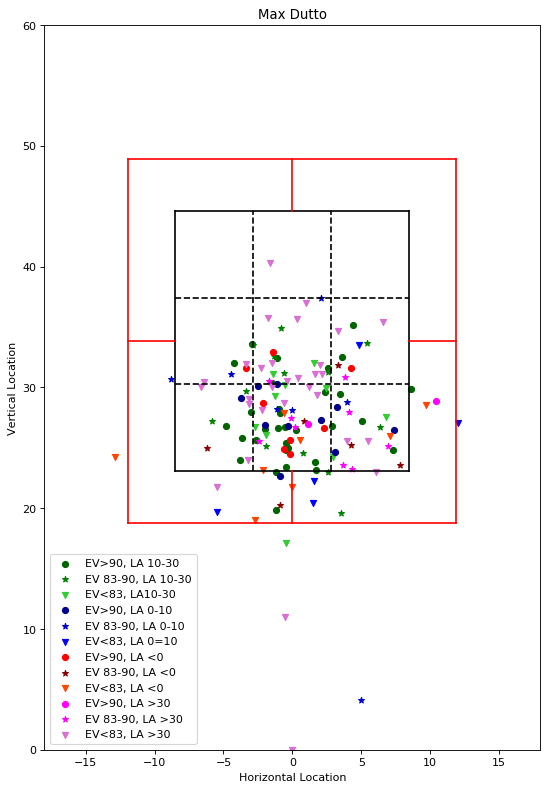

In [50]:
analyze(hx2,'Max Dutto','11/22/18','12/3/18',60,90)

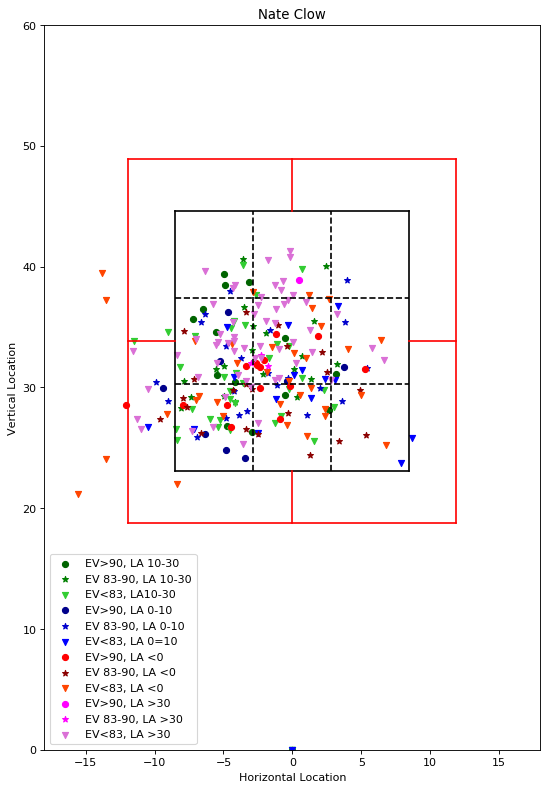

In [171]:
analyze(hx2, 'Nate Clow', 44,55, 60, 90)

In [85]:
#hxfina = hx2[['AB','Date','Time Stamp','Pitch','Strike Zone','P. Type','Velo','LA', 'Dist', 'Res', 'Type', 'Horiz. Angle', 'Pts', 'Hand Speed', 'BV', 'Trigger to Impact', 'AA', 'Impact Momentum', 'Strike Zone Bottom', 'Strike Zone Top', 'Strike Zone Width', 'Vertical Distance', 'Horizontal Distance', 'X', 'Y', 'POI Z', 'Bat Material', 'User', 'Pitch Angle', 'Level', 'Opposing Player', 'Tag', 'Barrel']]


In [27]:
#hxfina['Pitch Angle'] = np.NaN
#hxfina['Batting'] = np.NaN
#hxfina['Level'] = np.NaN
#hxfina['Opposing Player'] = np.NaN
#hxfina['Tag'] = np.NaN
#hxfina.shape

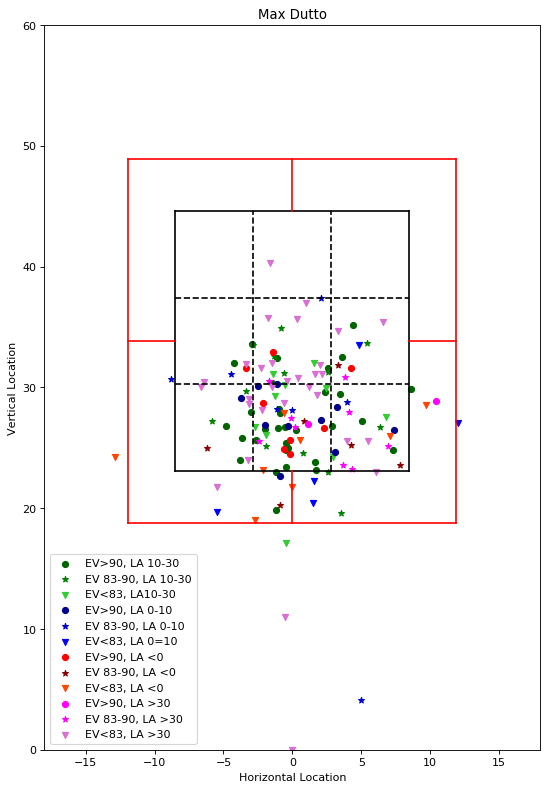

In [102]:
analyze(hxfina,'Max Dutto', 0, 0, 0, 0 )

In [106]:
hstats

,Fly Balls,Ground Balls,Line Drive,AvgExitVelo,Max Exit Velo
Z 1,0.0,0.0,0.0,0.0,0.0
Z 2,0.7,0.3,0.0,80.7,85.8
Z 3,0.0,0.0,0.0,0.0,0.0
Z 4,0.6,0.2,0.2,84.4,93.7
Z 5,0.6,0.0,0.4,79.4,96.6
Z 6,0.4,0.4,0.1,88.1,95.4
Z 7,0.4,0.3,0.3,86.7,98.8
Z 8,0.2,0.2,0.5,87.4,98.6
Z 9,0.3,0.1,0.6,86.1,96.9


In [111]:
d = hstats['AvgExitVelo']

In [112]:
d

Z 1     0.0
Z 2    80.7
Z 3     0.0
Z 4    84.4
Z 5    79.4
Z 6    88.1
Z 7    86.7
Z 8    87.4
Z 9    86.1
Name: AvgExitVelo, dtype: float64

In [114]:
d.values.reshape(3,3)

array([[ 0. , 80.7,  0. ],
       [84.4, 79.4, 88.1],
       [86.7, 87.4, 86.1]])

In [153]:
import plotly
import plotly.plotly as py
from plotly.tools import FigureFactory as FF
plotly.__version__
plotly.offline.init_notebook_mode(connected=True)


#fig = FF.create_annotated_heatmap(d, colorscale='Viridis')

#plotly.figure_factory.create_annotated_heatmap(d) 
#py.iplot(fig, filename='numpy-reshape-1')

import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Heatmap(z=[[0, 81.4, 0], [84,80,88], [87,87,86]],
                   x=['Left', 'Mid', 'Right'],
                   y=['Bottom', 'Mid', 'Top'])
data=[trace]
layout = go.Layout(
    autosize=False,
    title="Average Exit Velocity Heatmap",
    #textinfo='value',
    width=600,
    height=800,
    margin=go.layout.Margin(
        l=100,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor='#7f7f7f',
    plot_bgcolor='#c7c7c7'
)
fig = go.Figure(data = data, layout=layout)
plotly.offline.iplot(fig) 


In [133]:
plotly.__version__

'3.5.0'